[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\rafab\AppData\Local\Temp\ipykernel_13116\2163413713.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
C:\Users\rafab\AppData\Local\Temp\ipykernel_13116\

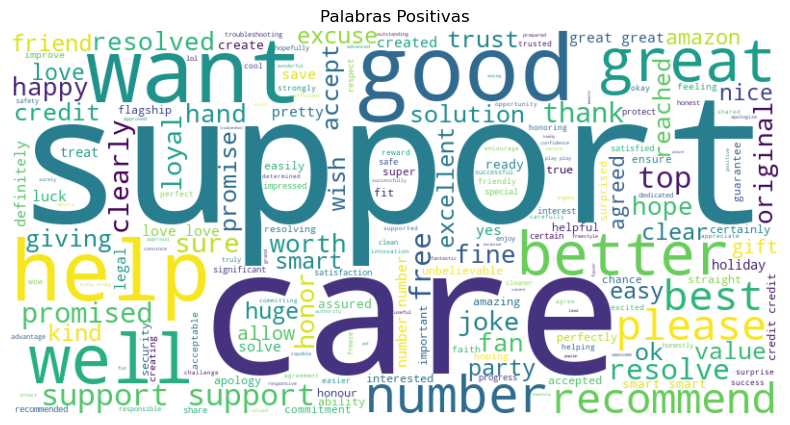

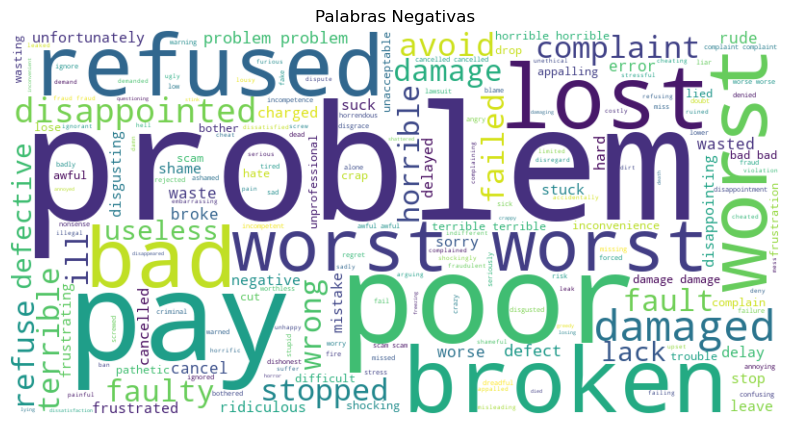

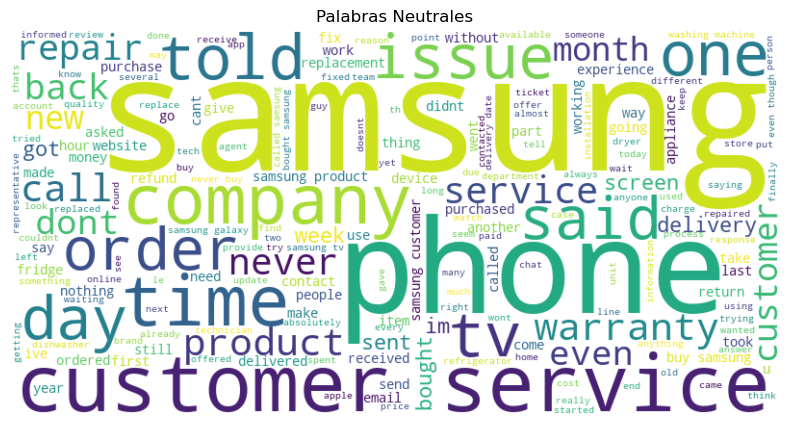

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Instanciar lematizador y analizador de sentimientos
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenizar y eliminar stopwords, y lematizar
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Cargar el archivo CSV
file_path = 'Data/Samsung Reviews.csv'
data = pd.read_csv(file_path)

# Eliminar filas con valores nulos en las columnas 'Title' y 'Text'
cleaned_data = data.dropna(subset=['Title', 'Text'])

# Aplicar preprocesamiento al texto combinado
cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
cleaned_data['Processed_Text'] = cleaned_data['Processed_Text'].apply(preprocess_text)

# Función para clasificar el sentimiento de las palabras
def sentiment_analysis(text):
    pos_words = []
    neg_words = []
    neu_words = []
    
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] >= 0.05:
            pos_words.append(word)
        elif score['compound'] <= -0.05:
            neg_words.append(word)
        else:
            neu_words.append(word)
    
    return pos_words, neg_words, neu_words

# Aplicar análisis de sentimiento al texto preprocesado
combined_text = ' '.join(cleaned_data['Processed_Text'])
pos_words, neg_words, neu_words = sentiment_analysis(combined_text)

# Función para generar y mostrar nubes de palabras
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nube de palabras positivas
generate_wordcloud(pos_words, 'Palabras Positivas')

# Nube de palabras negativas
generate_wordcloud(neg_words, 'Palabras Negativas')

# Nube de palabras neutrales
generate_wordcloud(neu_words, 'Palabras Neutrales')


In [2]:
# Modificar la función para devolver una etiqueta de sentimiento general
def sentiment_label(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la función a la columna 'Processed_Text' para obtener la etiqueta de sentimiento
cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)
cleaned_data

C:\Users\rafab\AppData\Local\Temp\ipykernel_13116\4149664210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment
0,11 hours ago,1,Alexander,"Very violent EULA, almost rapey",So you bought yourself a €2100 phone expecting...,NaN,NaN,violent eula almost rapey bought phone expecti...,Negative
1,13 hours ago,1,Andy Scott,Had a phone screen fixed under…,Had a phone screen fixed under warranty. Wasn'...,NaN,NaN,phone screen fixed phone screen fixed warranty...,Negative
2,3 days ago,1,Curtis Dorman,Used to be good,"It is so hard to remove stuff , like old email...",NaN,NaN,used good hard remove stuff like old email add...,Positive
3,3 days ago,1,Steven Smith,Don't waste your money,"I purchased a Z Fold 5. Poor signal, can't sen...",NaN,NaN,dont waste money purchased z fold poor signal ...,Positive
4,5 days ago,1,Brian Bradler,I have been using Samsung products and…,I have been using Samsung products and found t...,NaN,NaN,using samsung product using samsung product fo...,Negative
...,...,...,...,...,...,...,...,...,...
995,20-Jan-22,1,Tony Stern,Will not honor warrantee.,Used only Samsung products for years.They will...,NaN,NaN,honor warrantee used samsung product yearsthey...,Positive
996,19-Jan-22,1,St Monica,Horrendous,Horrendous. Trying to get help with faulty wa...,NaN,NaN,horrendous horrendous trying get help faulty w...,Negative
997,"Updated Jan 18, 2022",1,Marcelo,Samsung destroy the watch I sent for repair an...,"Send my watch for repair, it was inside the wa...",NaN,NaN,samsung destroy watch sent repair gave nothing...,Negative
998,16-Jan-22,1,Dominic Pallini,Samsung s21 Ultra 512 GB,"Samsung s21 Ultra 512 GB , Most expensive Sams...",NaN,NaN,samsung ultra gb samsung ultra gb expensive sa...,Negative


In [3]:
def calculate_nps(cleaned_data):
    promoters = cleaned_data[cleaned_data['Rating'] >= 4].shape[0]
    detractors = cleaned_data[cleaned_data['Rating'] <= 2].shape[0]
    passives = cleaned_data[cleaned_data['Rating'] == 3].shape[0]
    total_respondents = cleaned_data.shape[0]
    nps = ((promoters - detractors) / total_respondents) * 100
    return nps, promoters, passives, detractors

nps, promoters, passives, detractors = calculate_nps(cleaned_data)
print(f'Net Promoter Score (NPS): {nps}')

Net Promoter Score (NPS): -79.00608519269777


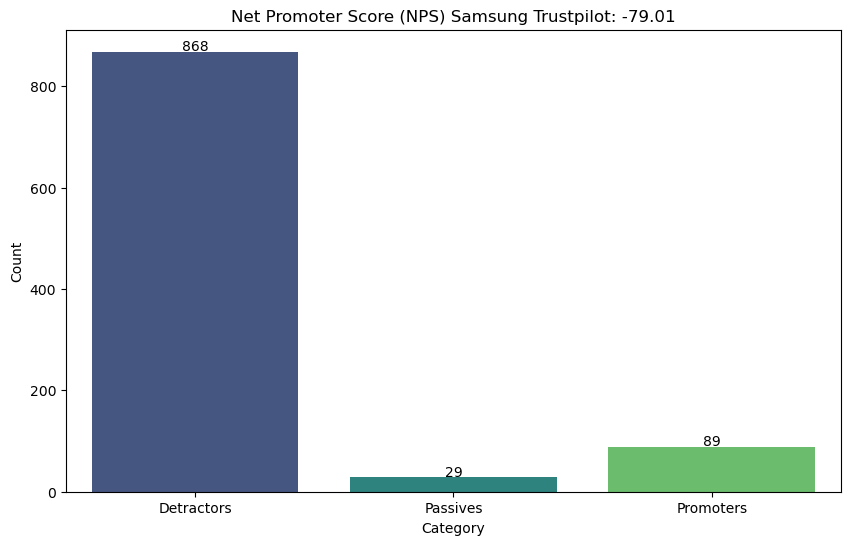

In [4]:
import seaborn as sns
# Datos para la visualización
nps_data = pd.DataFrame({
    'Category': ['Detractors', 'Passives', 'Promoters'],
    'Count': [detractors, passives, promoters]
})

# Crear el gráfico de barras para NPS
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=nps_data, palette='viridis')
plt.title(f'Net Promoter Score (NPS) Samsung Trustpilot: {nps:.2f}')
plt.xlabel('Category')
plt.ylabel('Count')

# Añadir las etiquetas de los valores en las barras
for index, value in enumerate(nps_data['Count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.show()

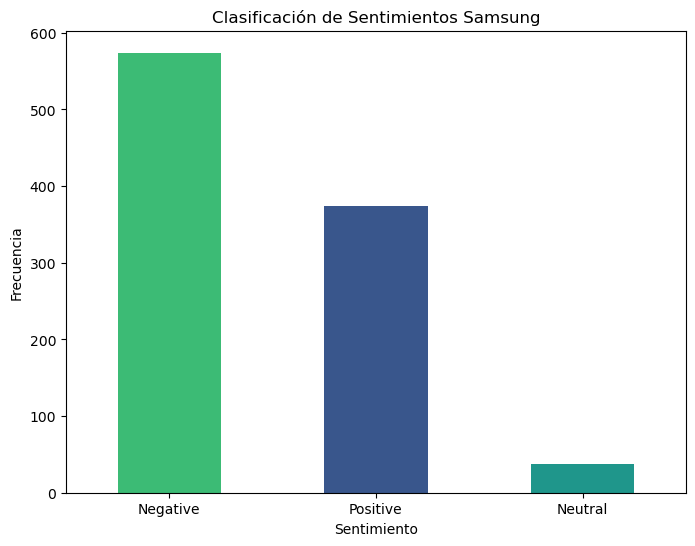

In [5]:
# Contar las ocurrencias de cada sentimiento
conteo_sentimientos = cleaned_data['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['#3CBB75FF', '#39568CFF', '#1F968BFF'])

# Establecer títulos y etiquetas
plt.title('Clasificación de Sentimientos Samsung')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la visualización
plt.show()


In [6]:
# Definimos las palabras clave para cada tema
keywords = {
    'Customer Service': ["service", "support", "help", "customer", "warranty", "experience", "Care", "refund", "coomunication", "repair", "contact", "claim"],
    'Staff': ["staff", "employee", "worker", "associate", "unprofessional", "techinician"],
    'Price': ["price", "cost", "expensive", "cheap", "$", "money", "pay"],
    'Ease of Use': ["easy", "difficult", "user-friendly", "complex", "friendly"],
    'Sales': ["sale", "discount", "offer", "sold", "purchased", "purchase", "buy", "bought", "free"],
    'Delivery': ["slow", "fast", "speed", "punctual", "delayed", "late", "early", "Delivery", "days", "weeks", "months", "week", "day", "month", "forever", "order", "ordered"],
    'Coverage': ["coverage", "network", "signal"],
    'Terms': ["terms", "conditions", "policy", "appliances"],
    'Setup': ["setup", "install", "configuration", "set up", "replacement", "implement", "implementation"],
    'Quality': ["security", "damaged", "material", "product", "broken", "package", "horrible", "good", "best", "worst", "terrible", "glitch", "bug", "impressed", "bad", "Quality", "malfunction", "feature", "issue", "update", "poor", "failed", "performance", "program", "screen"]
}

# Función para clasificar el tema basado en las palabras clave
def classify_topic(title, text):
    combined_text = f"{title} {text}".lower()
    for topic, words in keywords.items():
        if any(word in combined_text for word in words):
            return topic
    return 'Other'

# Aplicamos la función al DataFrame
cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']),axis=1)

# Mostramos las primeras filas para verificar
cleaned_data.head()


C:\Users\rafab\AppData\Local\Temp\ipykernel_13116\1573095348.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']),axis=1)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment,topic
0,11 hours ago,1,Alexander,"Very violent EULA, almost rapey",So you bought yourself a €2100 phone expecting...,NaN,NaN,violent eula almost rapey bought phone expecti...,Negative,Sales
1,13 hours ago,1,Andy Scott,Had a phone screen fixed under…,Had a phone screen fixed under warranty. Wasn'...,NaN,NaN,phone screen fixed phone screen fixed warranty...,Negative,Customer Service
2,3 days ago,1,Curtis Dorman,Used to be good,"It is so hard to remove stuff , like old email...",NaN,NaN,used good hard remove stuff like old email add...,Positive,Quality
3,3 days ago,1,Steven Smith,Don't waste your money,"I purchased a Z Fold 5. Poor signal, can't sen...",NaN,NaN,dont waste money purchased z fold poor signal ...,Positive,Customer Service
4,5 days ago,1,Brian Bradler,I have been using Samsung products and…,I have been using Samsung products and found t...,NaN,NaN,using samsung product using samsung product fo...,Negative,Price


In [7]:
# Prepara los datos para el heatmap
df_topics = cleaned_data['topic'].str.get_dummies(sep=',')
df_topics_sum = df_topics.sum().sort_values(ascending=False)

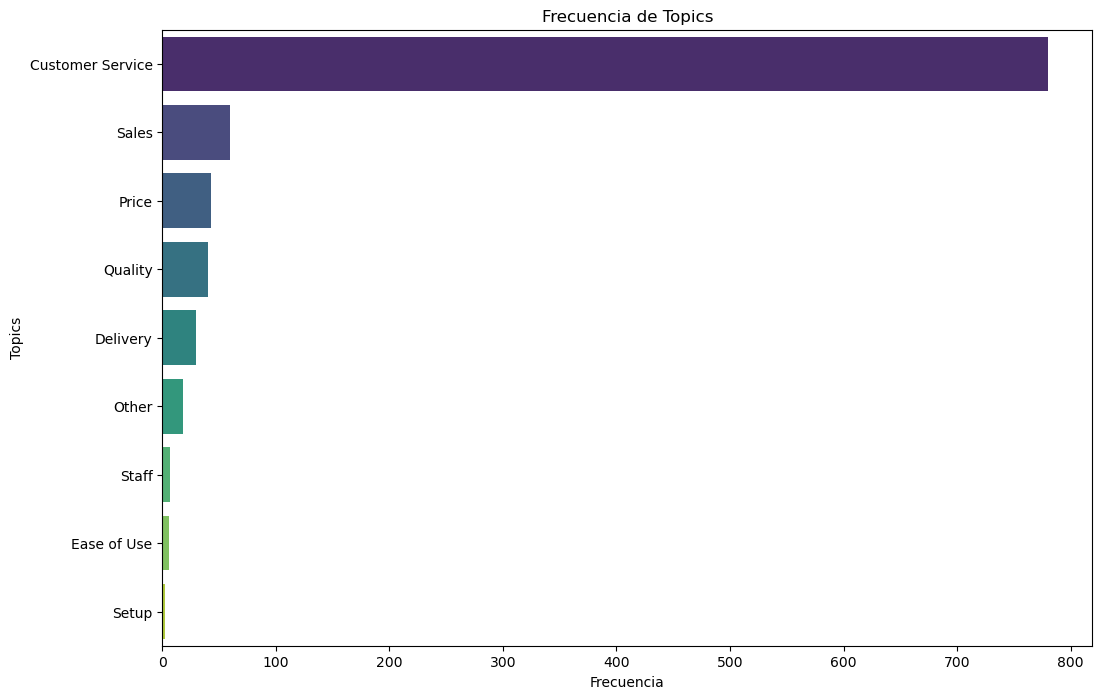

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_topics_sum.values, y=df_topics_sum.index, palette='viridis')
plt.title('Frecuencia de Topics')
plt.xlabel('Frecuencia')
plt.ylabel('Topics')
plt.show()

In [9]:
print(cleaned_data[cleaned_data['topic'] == 'Other'].head())

          Date  Rating            Name                                Title  \
159   4-Jan-24       1            Alex                     ONE UI 6 S21 FE?   
177  24-Jan-24       5        A. Demas                       I LOVE SAMSUNG   
189  24-Mar-24       1            Asia             Bans without explanation   
215  12-Nov-23       1           Cliff  Samsung promised me delivery of my…   
339  22-Jul-23       1  Kaelah English   If I could give zero stars I would   

                                                  Text  Response  \
159  correction du partage de connexion et du wifi ...       NaN   
177  I LOVE SAMSUNG , ALL U GUYS NEED TO STOP WHINI...       NaN   
189  Community bans users without any explanation, ...       NaN   
215  Samsung promised me delivery of my $3000 TV on...       NaN   
339  If I could give zero stars I would! Every nega...       NaN   

     Data Response                                     Processed_Text  \
159            NaN  one ui fe correction du

In [10]:
cleaned_data.to_csv('Samsung_reviews_modificado.csv', index = False)